In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h3><b> Question 1</h3></b>

\begin{equation}x_n \sim Weibull(k, \theta) \quad    for \quad n = 1,2..N \end{equation}

\begin{equation}
f(x) = \begin{cases}
\frac{k}{\theta} (\frac{x}{\theta})^{k-1} exp^{-\left(\frac{x}{\theta}\right)^k} & x \geq 0 \\
0 & x < 0
\end{cases}
\end{equation}

When k = 1, this reduces to an exponential distribution:
\begin{equation}
f(x) = \begin{cases}
\frac{1}{\theta} exp^{-\frac{x}{\theta}} & x \geq 0 \\
0 & x < 0
\end{cases}
\end{equation}

\begin{equation}
l(\theta) = - Nlog(\theta) - \frac{\sum x_i}{\theta}
\end{equation}

To calculate MLE:
\begin{equation}
\frac{dl}{d\theta} = - \frac{N}{\theta} + \frac{\sum x_i}{\theta^2}
\end{equation}

\begin{equation}
\implies \hat{\theta} = \frac{\sum x_i}{N}
\end{equation}

In [2]:
for N in [1,10,100,1000,10000]:
    x = np.random.exponential(2, N)
    MLE = np.sum(x)/N
    print('\nN=' + str(N) + ':')
    print('  MLE = ' + str(MLE))


N=1:
  MLE = 0.3396115561765516

N=10:
  MLE = 2.6519381627234724

N=100:
  MLE = 1.8841639212200298

N=1000:
  MLE = 2.037913965391342

N=10000:
  MLE = 2.013999435429514


<h3><b> Question 2 </h3></b>

Here we are given the Gumbel Distribution (Type I extreme value distribution). 
The PDF of the distribution is given by

\begin{equation}
f_{Y}(y) = \frac{1}{\sigma}exp\Big(\frac{-(y-\mu)}{\sigma}\Big)exp\Big(-exp\Big(\frac{-(y-\mu)}{\sigma}\Big)\Big)
\end{equation}

After generating the required exponential random variables and then taking their maximum to generate our data points, we are now tasked with finding the Maximum Likelihood Estimate(MLE) of Sigma. The theoretical value of sigma is given as 5 and the value of &mu; is given as 14.9787. To find the MLE, we first need to find the log-likelihood function for this PDF.

\begin{equation}
L(\theta) = -Nlog(\sigma) -\frac{1}{\sigma}((\sum_{i=1}^{N}y_i)-n\mu) - \sum_{i=1}^{N}exp{\Big(-\frac{(y_i-\mu)}{\sigma}\Big)} 
\end{equation}

There is no direct closed form expression when we try to maximise this expression with respect to \theta by taking the first derivative. We can however simplify the problem into solving these two equation simultaneously.

\begin{equation}
\sigma_{gev} = \bar{y} - \frac{\sum_{i=1}^{N}y_iexp\Big(-\frac{y_i}{\sigma_{gev}}\Big)}{\sum_{i=1}^{N}exp\Big(-\frac{y_i}{\sigma_{gev}}\Big)} ; \mu = -\sigma_{gev} ln\Big[\frac{1}{N}\sum_{i=1}^{N}exp\Big(-\frac{y_i}{\sigma_{gev}}\Big)\Big]
\end{equation}

Here, since we are concerned with only the value of &sigma;<sub>gev</sub>, we can use the first equation to iteratively solve for the value of &sigma;<sub>gev</sub>. For a good starting point, we use a property of the Gumbel Distribution.

<h4><b>Property:</h4></b>
The standard deviation of Y<sub>n</sub> (&sigma;) is related to &sigma;<sub>gev</sub>. as &sigma;<sub>gev</sub> = &sigma;&radic;6/&pi;.

Using this as an initial estimate, we compute the RHS of the expression. Then we take the average of this new and the old beta for faster convergence. Even though the code has an upper limit on number of iterations at 100, there's also a threshold (set at 0.00000001) and hence the code stops within 10-12 iterations.


In [3]:
N = [1,10,100,1000,10000]
k = 20 
lamda = 0.2

def X_matrix_generator(k,lamda,N):  
    A = []
    for j in range(N):
        A.append(np.random.exponential(1/lamda,k))
    return np.array(A)

X = []
for i in N:
    X.append(X_matrix_generator(k,lamda,i))


def mle_sigma_gev(X,k):
    if len(X)>1:
        Y = np.amax(X,axis = 1)
    if len(X)==1:
        return 0,0 
    mean = np.mean(Y)
    beta_old = np.std(Y)*np.sqrt(6)/(np.pi)
    beta_new = beta_old
    threshold = 0.00000001
    for i in range(100):
        a = np.sum(np.exp(-Y/beta_new))
        b = np.sum(Y*np.exp(-Y/beta_new))
        beta = mean - (b/a)
        beta_new = (beta + beta_old)/2.0
        if (np.abs(beta_new - beta_old) < threshold):
            break
        else:
            beta_old = beta_new
    return beta_new, i

for i in range(len(N)):
    sg,n = mle_sigma_gev(X[i],k)
    print("For N =",len(X[i]),'in',n,'iterations the MLE converged to',sg,'\n')

For N = 1 in 0 iterations the MLE converged to 0 

For N = 10 in 14 iterations the MLE converged to 4.1026863796687 

For N = 100 in 9 iterations the MLE converged to 3.893015910354346 

For N = 1000 in 11 iterations the MLE converged to 4.858737488133597 

For N = 10000 in 10 iterations the MLE converged to 4.814633311860412 



As mentioned, the code below shows another observation that was noticed when trying to solve this problem. Here the code keeps the number of samples fixed at N=10,000 and plots the variation of the MLE of &sigma;<sub>gev</sub> for increasing k (varied from 2 to 100)

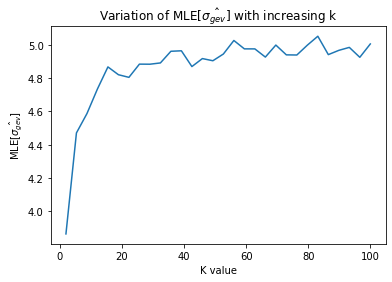

In [4]:
k = np.linspace(2,100,30)
sigma_gev = []
N = 10000
lamda = 0.2

for i in k:
    X = X_matrix_generator(int(i),lamda,N)
    sg,niter = mle_sigma_gev(X,i)
    sigma_gev.append(sg)

plt.plot(k,sigma_gev)
plt.xlabel('K value')
plt.ylabel('MLE['+r'$\hat{\sigma_{gev}}$'+']')
plt.title('Variation of MLE['+r'$\hat{\sigma_{gev}}$'+'] with increasing k')
plt.show()

<h4><b>Inferences from Question 2.</b></h4>

1. As the value of the number of samples increases, there seems to be an overall trend of convergence of the MLE towards the theoretical value of 5. The exact values are however heavily data dependent.

2. Another interesting observation was notices in this problem. For k=20, when the estimator expectation was plotted in problem 3, the &sigma;<sub>gev</sub> showed a convergence to 4.85 for large values of N. The reason for this anomaly is that as mentioned in the problem statement, the value of K has to be large and a value of 20 proves to be insufficient for this purpose. To illustrate this point, we plotted the graph of varying k with the MLE. As predicted, for higher values of K, the algorithm converges to 5 albeit with a lot of data dependent fluctuations.

<h3><b> Question 3 </h3></b>

<h4><b> Functions to extract MLE for the different parameters </h4></b>

Given one iteration of X, which is of shape NxK, find the relevant MLE for the different parameters.

$\hat{\theta} = \frac{\sum_{n,k=1} X_{nk}}{N}$

$\hat{\sigma_{gev}}$ is obtained from the previous question

$\hat{\sigma_{gpd}} = \frac{\sum_l S_l}{L}$.

We can theoretically very easily show that the estimator $\hat{\theta}$ will converge to $\frac{1}{\lambda}$, since it is just the mean of the observations, and from central limit theorem we know that the sample mean converges to expectation.

Also, in this case, the form of the pdf for X is exponential. One really nice property about the exponential distribution is that the conditional distribution of excess value X given that X is greater than some value, is also exponential, with the same parameter. While the generalised pareto distribution holds for large thresholds, in this case because of the nature of the pdf of X, we can say that it will always hold, for all values of d. Hence expectation of the estimator theoretically in this case is also equal to $\lambda$.

We are also given that the value of scaling parameter theoretically for GEV distribution is equal to 5 for $\lambda = 0.2$. 

Thus, because of the special pdf involved, we know that the thereotical expectation values of all the estimators are equal to 5. We provide simulation results to support this below, and also make observations and inferences. 

In [5]:
def get_param_mle(N,K,d,mu,exp_param):
    
    scale_fac = 1/exp_param
    X = np.random.exponential(scale=scale_fac,size=(N,K))
    theta_hat = np.mean(X[:,0])
    
    X_ravel = np.ravel(X)
    ii = np.where(X_ravel>d)[0]
    if len(ii)!=0:
        S = X_ravel[ii]-d
        sigma_gpd = np.mean(S)
        
        #sigma_gev = sigma_gpd.copy() #Temporary provision, until code from Q2 becomes available.
        
        sigma_gev, it = mle_sigma_gev(X,K)
        
    else:
        theta_hat = None
        sigma_gpd = None
        sigma_gev= None
    
    return theta_hat, sigma_gev, sigma_gpd

<h4><b> Function to get MLE over may iterations </h4></b>

The function described above just gives us the MLE for one instance of X. We need an ensemble of estimators, in order to get the expectations, variances and to construct the pdfs and cdfs. The function below does just that, by looping over many iterations to get the distribution of estimators.

In [6]:
def run_mle_iterations(num_iter,N,K,d,mu,exp_param):
    iter_index = 0
    
    theta_hat_array = np.zeros(num_iter)
    sigma_gev_array = np.zeros(num_iter)
    sigma_gpd_array = np.zeros(num_iter)
    
    while(iter_index<num_iter):
        theta_hat, sigma_gev, sigma_gpd = get_param_mle(N,K,d,mu,exp_param)
        if theta_hat!=None:
            theta_hat_array[iter_index] = theta_hat
            sigma_gev_array[iter_index] = sigma_gev
            sigma_gpd_array[iter_index] = sigma_gpd
            iter_index+=1
    
    return theta_hat_array, sigma_gev_array, sigma_gpd_array

<h4><b> Parts a and b.</h4></b>

Here we print and plot the expectations and variances of the estimators for different values of N.

We report our observations in tabular form in the next textwrite cell.

Also, we also get the ensemble of estimators for different values of N, which will be used to get the empirical cdfs and pdfs.

In [7]:
num_iter = 10000
N_array = np.array([1,10,100,1000,10000])
K = 20
d = 23
mu = 14
exp_param = 0.2

theta_hat_matrix = np.zeros((len(N_array),num_iter))
sigma_gev_matrix = np.zeros((len(N_array),num_iter))
sigma_gpd_matrix = np.zeros((len(N_array),num_iter))

E_theta_array = np.zeros(len(N_array))
Var_theta_array = np.zeros(len(N_array))
E_sigma_gev_array = np.zeros(len(N_array))
Var_sigma_gev_array = np.zeros(len(N_array))
E_sigma_gpd_array = np.zeros(len(N_array))
Var_sigma_gpd_array = np.zeros(len(N_array))


for i in range(len(N_array)):
    theta_hat_matrix[i], sigma_gev_matrix[i], sigma_gpd_matrix[i] = run_mle_iterations(num_iter,N_array[i],K,d,mu,exp_param)

    print('=============================')
    print('N = ',end='')
    print(N_array[i])

    E_theta_array[i] = np.mean(theta_hat_matrix[i])
    Var_theta_array[i] = np.var(theta_hat_matrix[i])

    print('Expectation of theta = ',end='')
    print(E_theta_array[i])
    print('Variance of theta = ',end='')
    print(Var_theta_array[i])
    print('\n')

    E_sigma_gev_array[i] = np.mean(sigma_gev_matrix[i])
    Var_sigma_gev_array[i] = np.var(sigma_gev_matrix[i])
    print('Expectation of sigma gev = ',end='')
    print(E_sigma_gev_array[i])
    print('Variance of sigma gev = ',end='')
    print(Var_sigma_gev_array[i])
    print('\n')

    E_sigma_gpd_array[i] = np.mean(sigma_gpd_matrix[i])
    Var_sigma_gpd_array[i] = np.var(sigma_gpd_matrix[i])
    print('Expectation of sigma gpd = ',end='')
    print(E_sigma_gpd_array[i])
    print('Variance of sigma gpd = ',end='')
    print(Var_sigma_gpd_array[i])
    print('\n')

N = 1
Expectation of theta = 6.078631091153121
Variance of theta = 49.099020019193546


Expectation of sigma gev = 0.0
Variance of sigma gev = 0.0


Expectation of sigma gpd = 5.062537639268975
Variance of sigma gpd = 24.20782297190208


N = 10
Expectation of theta = 5.072325390483308
Variance of theta = 2.6603717640912974


Expectation of sigma gev = 4.691649929771496
Variance of sigma gev = 1.2756210425028767


Expectation of sigma gpd = 4.971462242282921
Variance of sigma gpd = 14.604464306331518


N = 100
Expectation of theta = 5.005045314800563
Variance of theta = 0.25690466123825334


Expectation of sigma gev = 4.8224461498488305
Variance of sigma gev = 0.14312484522186442


Expectation of sigma gpd = 4.996676757248067
Variance of sigma gpd = 1.3006756774671393


N = 1000
Expectation of theta = 4.999650415994451
Variance of theta = 0.025072988860966813


Expectation of sigma gev = 4.847719519353884
Variance of sigma gev = 0.014021177888622938


Expectation of sigma gpd = 4.994709

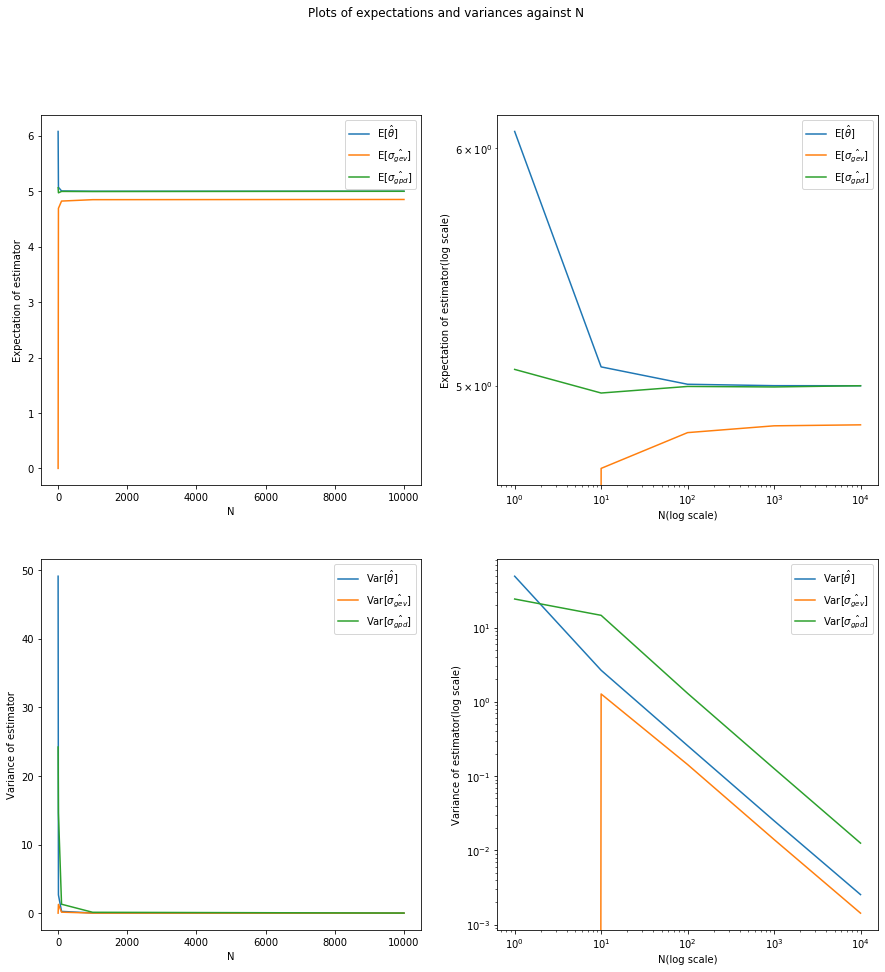

In [8]:
#Plots of expectations and variances against N
fig, ax = plt.subplots(2,2,figsize=(15,15))

ax[0][0].plot(N_array, E_theta_array,label='E['+r'$\hat{\theta}$'+']')
ax[0][0].plot(N_array, E_sigma_gev_array,label='E['+r'$\hat{\sigma_{gev}}$'+']')
ax[0][0].plot(N_array, E_sigma_gpd_array,label='E['+r'$\hat{\sigma_{gpd}}$'+']')
ax[0][0].set_xlabel('N')
ax[0][0].set_ylabel('Expectation of estimator')
ax[0][0].legend()

ax[0][1].plot(N_array, E_theta_array,label='E['+r'$\hat{\theta}$'+']')
ax[0][1].plot(N_array, E_sigma_gev_array,label='E['+r'$\hat{\sigma_{gev}}$'+']')
ax[0][1].plot(N_array, E_sigma_gpd_array,label='E['+r'$\hat{\sigma_{gpd}}$'+']')
ax[0][1].set_xlabel('N(log scale)')
ax[0][1].set_ylabel('Expectation of estimator(log scale)')
ax[0][1].set_yscale('log')
ax[0][1].set_xscale('log')
ax[0][1].legend()

ax[1][0].plot(N_array, Var_theta_array,label='Var['+r'$\hat{\theta}$'+']')
ax[1][0].plot(N_array, Var_sigma_gev_array,label='Var['+r'$\hat{\sigma_{gev}}$'+']')
ax[1][0].plot(N_array, Var_sigma_gpd_array,label='Var['+r'$\hat{\sigma_{gpd}}$'+']')
ax[1][0].set_xlabel('N')
ax[1][0].set_ylabel('Variance of estimator')
ax[1][0].legend()

ax[1][1].plot(N_array, Var_theta_array,label='Var['+r'$\hat{\theta}$'+']')
ax[1][1].plot(N_array, Var_sigma_gev_array,label='Var['+r'$\hat{\sigma_{gev}}$'+']')
ax[1][1].plot(N_array, Var_sigma_gpd_array,label='Var['+r'$\hat{\sigma_{gpd}}$'+']')
ax[1][1].set_xlabel('N(log scale)')
ax[1][1].set_ylabel('Variance of estimator(log scale)')
ax[1][1].set_yscale('log')
ax[1][1].set_xscale('log')
ax[1][1].legend()

plt.suptitle('Plots of expectations and variances against N')
plt.show()

### Tables for the expectations and variances against N

Ensemble size = 10000

Table for expectations

|N/Estimator|$\hat{\theta}$|$\hat{\sigma_{gev}}$|$\hat{\sigma_{gev}}$|
|-----------|--------------|--------------------|--------------------|
|1|5.950329901248642|0.0|5.033953227534965|
|10|5.043588356025091|4.694070682196424|4.996358277655083|
|100|5.003858218579122|4.822220341981129|5.015853250839413|
|1000|4.999944635807824|4.849626615792224|4.996163777915849|
|10000|4.9998879762576465|4.852413282803332|5.001149746187272|

Table for variance

|N/Estimator|$\hat{\theta}$|$\hat{\sigma_{gev}}$|$\hat{\sigma_{gev}}$|
|-----------|--------------|--------------------|--------------------|
|1|45.02023265731358|0.0|24.76322371874191|
|10|2.580213342554128|1.2919900989448299|14.11663342556236|
|100|0.2477669982837358|0.14727024328073085|1.293763196613956|
|1000|0.02445510433380918|0.014610281029785855|0.12486491073293028|
|10000|0.0025150038728337584|0.0014424768522638954|0.012753353921647488|

## Observations for parts a and b

1. Regarding values for expectations, one can observe that the values of expectations for all the estimators are very close to 2. The mean gets closer to 5 as N increases, and we can say with fair amount of confidence that all the estimators are asymptotically unbiased with N.
3. Regarding values for variances: For all of the estimators, one can see that the variance decreases with N. We have plotted the estimators vs N in log log scale, and one can clearly see that the variance decreases as roughly 10 times as N is increased by a factor of 10. The plot is also a stright line in log log scale, strongly confirming the earlier remarks.
4. **Note that only in this special example given to us, the values of estimators are theoretically exactly same. In general these represent different quantities. But for this special example, they are equivalent, and we are using this to make comments on noise in estimation etc.**. Now we proceed to variance comparison between the different estimators, for a fixed N. One can immediately see from the plots that $\hat{\sigma_{gev}}$ has the least noise, followed by $\hat{\theta}$ and then $\hat{\sigma_{gev}}$. How does one explain this fact?
  
  a. The estimator $\hat{\sigma_{gpd}}$ is based on the excess value. For $\lambda = 0.2, d = 23$, a fraction $e^{-\lambda d} = 0.01$ of the total N x K observations are expected to be greater than d. For K = 20, this is equal to $\frac{N}{5}$ data points.
  
  b.The estimator $\hat{\theta}$ is based on N observations of $X_{nk}$.

  c. The estimator $\hat{\sigma_{gev}}$ is also based on N observations. But these N observations are based on the greatest value along the row. So there is this extra information available to us that these are the greatest in magnitude along a row, and hence despite also having the same number of datapoints available to us as $\hat{\theta}$, GEV estimator beats it because of this extra piece of information.

## Part c

**Asymptotic Distribution**<br><br>
*Theorem*: Assume $X_1, X_2, ..., X_n$ are iid random variables with pdf $f(x;\theta_o)$ for $\theta_o \in \Omega$ such that all regularity conditions are obeyed. Suppose further that $0<I(\theta_o)<\infty$. Then, any consistent sequence of solutions the MLE equation satisfies: 
$$ \sqrt{N}(\hat{\theta} - \theta_o) \xrightarrow{D} \mathcal{N}\, (0, \frac{1}{I(\theta_o)})$$

Here, $\mathcal{N}\, (0, \frac{1}{I(\theta_o)})$ is the asymptotic distribution of the MLE.
<br><br>
We find the asymptotic distributions for the three distributions, namely the Exponential Distribution, Gumbel Distribution and Generalized Pareto Distribution.<br><br>

**Fisher Information**

We first evaluate the Fisher Information for the Exponential Distribution, Gumbel Distribution and the Generalized Pareto Distribution.
<br><br>
We know that $I(\theta) = \int_{-\infty}^{\infty} \frac{\partial logf_X(x;\theta)}{\partial \theta} \frac{\partial logf_X(x;\theta)}{\partial \theta}f_X(x;\theta)\,dx $
<br><br>

For the Exponential Distribution with the PDF defined as:
\begin{equation}
f_X(x;\theta) = \begin{cases}
\frac{1}{\theta} exp({-\frac{x}{\theta}}) & x \geq 0 \\
0 & x < 0
\end{cases}
\end{equation}
<br>
The Fisher Information, $I(\theta)$ can be obtained in the closed form using the aforementioned equation, as follows:
$$ I(\theta) = \frac{1}{\theta^2}$$
For $\theta = 5$, this comes out to be $I(\theta) = \frac{1}{25}$
<br><br>
Similarly, for the GPD, having the PDF defined as:
\begin{equation}
f_S(s;\sigma) = \begin{cases}
\frac{1}{\sigma} exp({-\frac{s}{\sigma}}) & s \geq 0 \\
0 & s < 0
\end{cases}
\end{equation}
<br>
The Fisher Information is given by:
$$ I(\sigma) = \frac{1}{\sigma^2}$$
For $\sigma = 5$, this comes out to be $I(\sigma) = \frac{1}{25}$

<br><br>
Now, it is not possible to easily evaluate a closed form expression for the Gumbel Distribution. Hence, we use scipy's integrate method to evaluate the above integral for the Gumbel distribution, whose pdf is given by:
\begin{equation}
f_Y(y;\sigma) = \begin{cases}
\frac{1}{\sigma}exp\Big(\frac{-(y-\mu)}{\sigma}\Big)exp\Big(-exp\Big(\frac{-(y-\mu)}{\sigma}\Big)\Big) & x \geq 0 \\
0 & x < 0
\end{cases}
\end{equation}
<br><br>
The code to evaluate the integral is as follows:



In [9]:
# Fisher Information for Gumbel Distribution
mu_gumbel = 14.9787
sigma_gev_theoretical = 5
def gumbel_log_derivative(y, mu_gumbel, sigma_gev_theoretical):
    dellogf = (-1/sigma_gev_theoretical) + ((y-mu_gumbel)/(sigma_gev_theoretical**2)) - ((y-mu_gumbel)/(sigma_gev_theoretical**2))*np.exp(-((y-mu_gumbel))/sigma_gev_theoretical)
    return dellogf

def gumbel(y, mu_gumbel, sigma_gev_theoretical):
    f = (1/sigma_gev_theoretical)*np.exp(-(y-mu_gumbel)/sigma_gev_theoretical)*np.exp(-np.exp(-(y-mu_gumbel)/sigma_gev_theoretical))
    return f

In [10]:
import scipy.integrate as integrate
result = integrate.quad(lambda y: gumbel_log_derivative(y, mu_gumbel, sigma_gev_theoretical)*gumbel_log_derivative(y, mu_gumbel, sigma_gev_theoretical)*\
                        gumbel(y, mu_gumbel, sigma_gev_theoretical), 0, np.inf)

# result[0] represents the result of the integral which is the Fisher Information value

*result[0]* in the above expression is the value of the integral, which in turn is equal to Fisher Information, $I(\sigma)$. <br>For this case, $I(\sigma) = 0.0729$.<br><br>

**Estimated Distributions**<br><br>
Now, we move on to plotting the cdf of the three distributions from the data samples obtained from parts a and b of this question. Code for the same is in the next code cell. The columns represents the CDF of $\sqrt{N}(\hat{\theta} - \theta)$, $\sqrt{N}(\hat{\sigma}_{gev} - \sigma)$ and $\sqrt{L}(\hat{\sigma}_{gpd} - \sigma)$ respectively for different values of $N$, namely $N = 1, 10, 100, 1000, 10000$. Additionally, at the bottom of each column, we have included the asymptotic distribution for each case as well to show convergence.

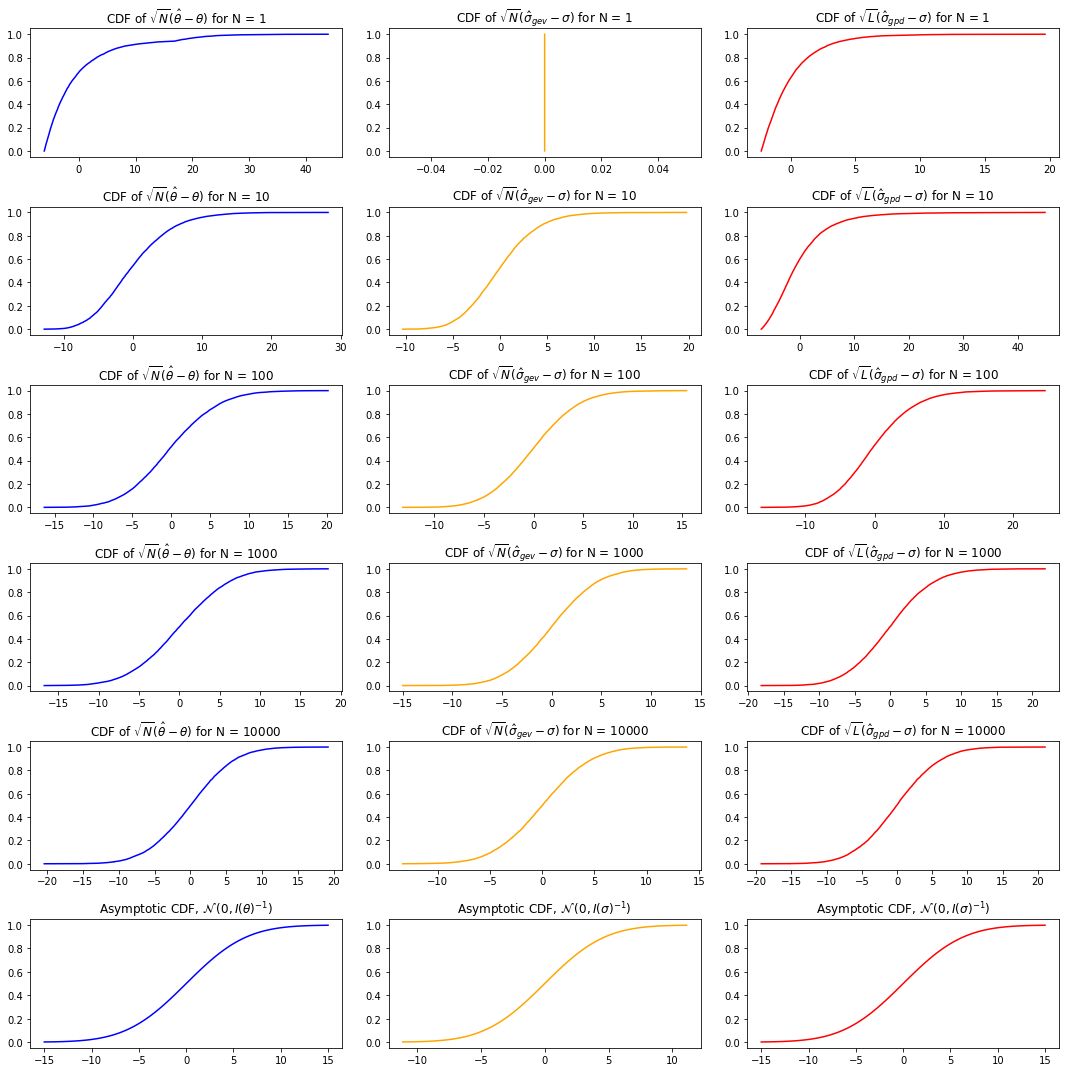

In [11]:
fig, ax = plt.subplots(len(N_array)+1,3,figsize=(15,15))

for i in range(len(N_array)):
    theta_theoretical = E_theta_array[i]
    cdf0 = np.sqrt(N_array[i])*(sorted(theta_hat_matrix[i]) - theta_theoretical*np.ones(len(theta_hat_matrix[i])))
    p = 1. * np.arange(len(cdf0)) / (len(cdf0) - 1)
    ax[i][0].plot(cdf0, p, c = "blue")
    ax[i][0].set_title(r'CDF of $\sqrt{N}(\hat{\theta} - \theta)$ for N = %d'%N_array[i])
    
    sigma_gev_theoretical = E_sigma_gev_array[i]
    cdf1 = np.sqrt(N_array[i])*(sorted(sigma_gev_matrix[i]) - sigma_gev_theoretical*np.ones(len(sigma_gev_matrix[i])))
    p = 1. * np.arange(len(cdf1)) / (len(cdf1) - 1)
    ax[i][1].plot(cdf1, p, c = "orange")
    ax[i][1].set_title(r'CDF of $\sqrt{N}(\hat{\sigma}_{gev} - \sigma)$ for N = %d'%N_array[i])
    
    L = N_array[i]*K*np.exp(-exp_param*d)
    sigma_gpd_theoretical = E_sigma_gpd_array[i]
    cdf2 = np.sqrt(L)*(sorted(sigma_gpd_matrix[i]) - sigma_gpd_theoretical*np.ones(len(sigma_gpd_matrix[i])))
    p = 1. * np.arange(len(cdf2)) / (len(cdf2) - 1)
    ax[i][2].plot(cdf2, p, c = "red")
    ax[i][2].set_title(r'CDF of $\sqrt{L}(\hat{\sigma}_{gpd} - \sigma)$ for N = %d'%N_array[i])
    
# CDF check for theta, sigma_gev, sigma_gpd

from scipy import stats
import math

mu = 0
variance = 25
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax[-1][0].plot(x, stats.norm.cdf(x, mu, sigma), c = "blue")
ax[-1][0].set_title(r'Asymptotic CDF, $\mathcal{N}\, (0, I(\theta)^{-1})$')

mu = 0
variance = 1/(result[0])
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax[-1][1].plot(x, stats.norm.cdf(x, mu, sigma), c = "orange")
ax[-1][1].set_title(r'Asymptotic CDF, $\mathcal{N}\, (0, I(\sigma)^{-1})$')

mu = 0
variance = 25
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax[-1][2].plot(x, stats.norm.cdf(x, mu, sigma), c = "red")
ax[-1][2].set_title(r'Asymptotic CDF, $\mathcal{N}\, (0, I(\sigma)^{-1})$')

fig.tight_layout() 
plt.show()

## Observations about part c

1) The CDF curve for all the three cases take the typical S shape, which is characteristic of the Normal Distribution.<br><br>
2) The CDF is centered around 0 for all the three distributions.<br><br>
3) According to the theorem stated above, the sequences of MLE solutions should converge in distribution to Normal Distributions with mean = $0$ and variance = $I^{-1}$, where $I$ is the Fisher Information.<br><br>
4) Comparing with the CDF of the asymptotic distribution, we find that as N increases, the CDF of the estimated distributions converge to the asymptotic distribution.<br><br>

## Part d

We perform a similar activity for the PDFs as well.<br>
*Note*: As per the equation for $\sigma_{gev}$ described above, $\sigma_{gev} = 0$ for N = 1. Hence, if we run the MLE iterations in parts a and b above, the vector sigma_gev_matrix[0] does not get updated at all, hence remaining at zero. Therefore, this results in a singular matrix while evaluating the Gaussian KDE. Thus, the PDF for N = 1 for $\sigma_{gev}$ cannot be evaluated using Gaussian KDE and without incorporating limits and has been left blank in order to facilitate readibility and alignment of the other graphs. This can be seen from the CDF of $\sigma_{gev}$ at N = 1 from part c. It is basically a dirac-delta, which is known to be non-differentiable (and hence pdf cannot be obtained without using limits).

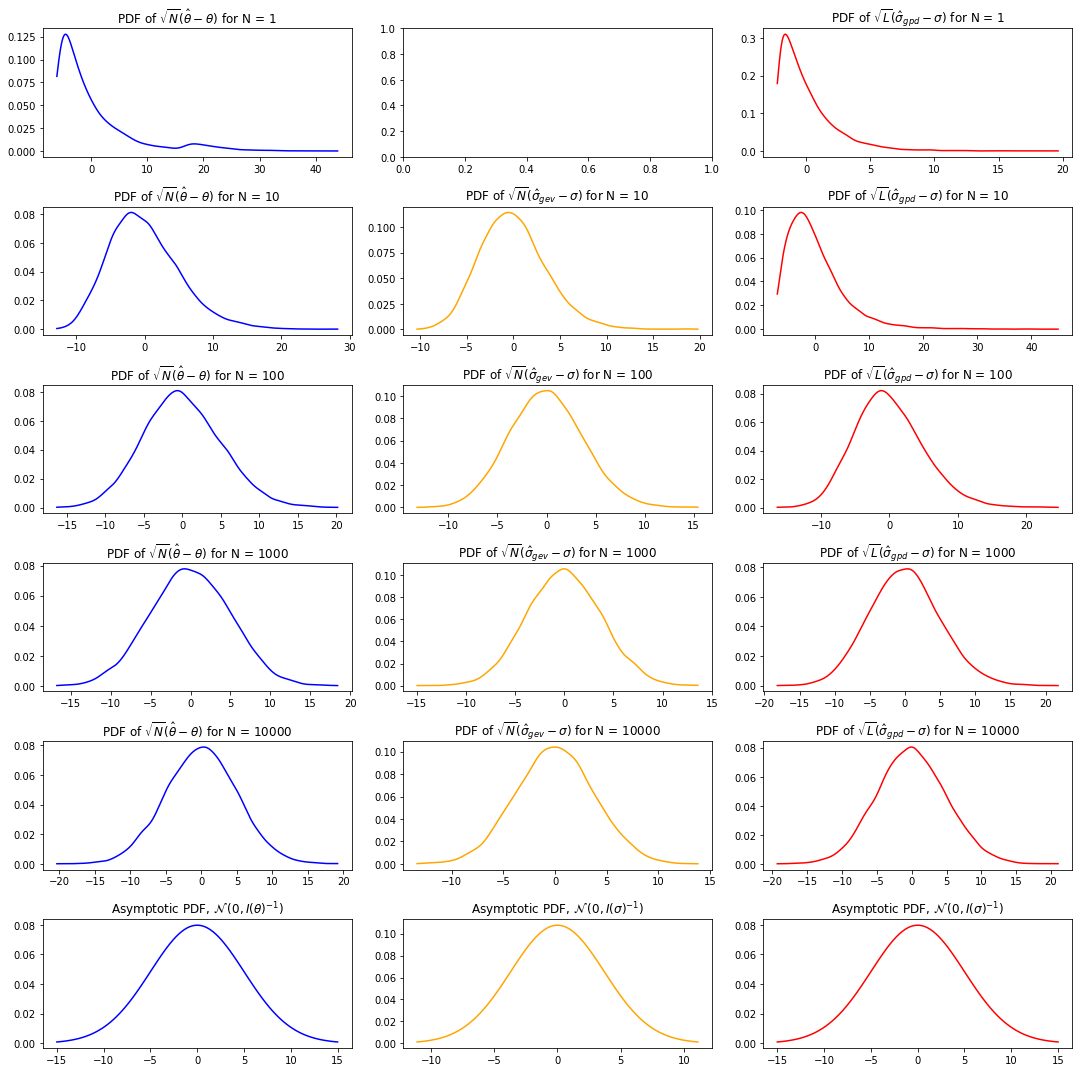

In [12]:
fig, ax = plt.subplots(len(N_array)+1,3,figsize=(15,15))

for i in range(len(N_array)):
    
    theta_theoretical = E_theta_array[i]
    pdf0 = np.sqrt(N_array[i])*(theta_hat_matrix[i] - theta_theoretical*np.ones(len(theta_hat_matrix[i])))
    kde = stats.gaussian_kde(pdf0)
    dist_space = np.linspace(min(pdf0), max(pdf0), 1000)
    ax[i][0].plot(dist_space, kde(dist_space), c = "blue")
    ax[i][0].set_title(r'PDF of $\sqrt{N}(\hat{\theta} - \theta)$ for N = %d'%N_array[i])
    
    if i!=0:
        sigma_gev_theoretical = E_sigma_gev_array[i]
        pdf1 = np.sqrt(N_array[i])*(sigma_gev_matrix[i] - sigma_gev_theoretical*np.ones(len(sigma_gev_matrix[i])))
        kde = stats.gaussian_kde(pdf1)
        dist_space = np.linspace(min(pdf1), max(pdf1), 1000)
        ax[i][1].plot(dist_space, kde(dist_space), c = "orange")
        ax[i][1].set_title(r'PDF of $\sqrt{N}(\hat{\sigma}_{gev} - \sigma)$ for N = %d'%N_array[i])
    
    L = N_array[i]*K*np.exp(-exp_param*d)
    sigma_gpd_theoretical = E_sigma_gpd_array[i]
    pdf2 = np.sqrt(L)*(sigma_gpd_matrix[i] - sigma_gpd_theoretical*np.ones(len(sigma_gpd_matrix[i])))
    kde = stats.gaussian_kde(pdf2)
    dist_space = np.linspace(min(pdf2), max(pdf2), 1000)
    ax[i][2].plot(dist_space, kde(dist_space), c = "red")
    ax[i][2].set_title(r'PDF of $\sqrt{L}(\hat{\sigma}_{gpd} - \sigma)$ for N = %d'%N_array[i])
    

# PDF check for theta, sigma_gev, sigma_gpd

from scipy import stats
import math

mu = 0
variance = 25
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax[-1][0].plot(x, stats.norm.pdf(x, mu, sigma), c = "blue")
ax[-1][0].set_title(r'Asymptotic PDF, $\mathcal{N}\, (0, I(\theta)^{-1})$')

mu = 0
variance = 1/(result[0])
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax[-1][1].plot(x, stats.norm.pdf(x, mu, sigma), c = "orange")
ax[-1][1].set_title(r'Asymptotic PDF, $\mathcal{N}\, (0, I(\sigma)^{-1})$')

mu = 0
variance = 25
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax[-1][2].plot(x, stats.norm.pdf(x, mu, sigma), c = "red")
ax[-1][2].set_title(r'Asymptotic PDF, $\mathcal{N}\, (0, I(\sigma)^{-1})$')

fig.tight_layout() 
plt.show()

## Observations about part d

1) The PDF curve for all the three cases take the typical bell curve shape, which is characteristic of the Normal Distribution.<br><br>
2) The PDF is centered around 0 for all the three distributions.<br><br>
3) The peak of the pdf is given by $\frac{1}{\sqrt{2\times\pi\times variance}}$. Since variance = $I^{-1}$, peak = $\frac{\sqrt{I}}{\sqrt{2\times\pi}}$. For the three cases, this comes out to be equal to $~0.8$ for the Exponential Distribution and GPD, and equal to $0.1077$ for the Gumbel Distribution. These are the values that we also practically obtained.<br><br>
4) Just as in the case of the CDF, according to the theorem stated above, the sequences of MLE solutions should converge in distribution to Normal Distributions with mean = $0$ and variance = $I^{-1}$, where $I$ is the Fisher Information.<br><br>
5) Comparing with the PDF of the asymptotic distribution, we find that as N increases, the PDF of the estimated distributions converge to the asymptotic distribution.<br><br>